# <center>Uczenie maszynowe</center>

<br>

<br>

## <center>Proces rozwiązywania problemów z zastosowaniem uczenia maszynowego</center>

<img src="Grafika/CRISP_DM_Process_Diagram.png" width="350">
Źródło: https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/897px-CRISP-DM_Process_Diagram.png

<br>

<br>

<br>

<br>

<br>




 <br>

## Kilka faktów na temat uczenia maszynowego

* ML to zarówno nauka jak i sztuka.

* Nie istnieje metoda "najlepsza" - każdy problem wymaga indywidualnego podejścia.

* Rozwiązanie problemu ML = reprezentacja danych + algorytm.

  - w codziennej praktyce pierwszy czynnik często niedoceniany. Przetworzanie danych jest równie ważne jak same algorytmy, a nawet często dane są ważniejsze od algorytmu - często większy wpływ na wyniki ma postać danych (ich przygotowanie/przetworzenie) niż wybór konkretnego algorytmu.

* Bardzo ważne jest zdefiniowanie celu jaki chcemy osiągnąć i rozumienie jak dane i algorytmy z tym celem się wiążą.


 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 ## Dwa główne nurty uczenia maszynowego:
* uczenie nadzorowane (*supervised learning*)
* uczenie nienadzorowane (*unsupervised learning*)

  <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
## Uczenie nadzorowane

Dla znanych par (X,Y) szukamy zależności między X a Y - budujemy model, który na podstawie X przewidzi Y.
 

* regresja: Y jest zmienną rzeczywistą

* klasyfikacja: Y jest zmienną dyskretną (np. binarną - o wartościach 0 i 1)

 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
## Zagadnienie klasyfikacji - przykłady:
- predykcja churnu - przewidywanie na podstawie cech klienta (opisujących m.in. jego zachowanie) czy klient odejdzie w najbliższym czasie (np. w ciągu miesiąca);
- scoring kredytowy - przewidywanie czy klient ubiegający się o kredyt spłaci go w terminie;
- rozpoznawanie choroby - rozpoznawanie na podstawie parametrów medycznych czy pacjent zachoruje/jest chory;
- klasyfikacja tematyczna tekstu;
- klasyfikacja wydźwięku opini;
- rozpoznawanie zawartosci obrazów.

# Regresja logistyczna

Rozważamy problem klasyfikacji binarnej: $X \in \mathbb{R}^p$, $Y \in \{0, 1\}$.

Założenia modelu:

$$
Y =
\begin{cases}
1, \text{ z prawdopodobieństwem } \pi(x)\\
0, \text{ z prawdopodobieństwem } 1-\pi(x).\\
\end{cases}$$

, gdzie

$\pi(x)=P(Y=1 \mid x)$.

Czyli innymi słowy:

$$\large Y \sim B(\pi(x)),$$


B($\cdot$) - rozkład dwupunktowy, 


Model:

$$\large \pi(x) = \frac{1}{1+e^{-\beta x}},$$

$\beta = (\beta_0,\beta_1, \ldots, \beta_p),$   $\beta x = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p.$

 <br>
 
 <br>
 
Predykcja wartości Y przy użyciu regresji logistycznej:

$$
\hat{y} =
\begin{cases}
1, \text{ gdy } \pi(x) > 0.5\\
0, \text{ gdy } \pi(x) \leq 0.5\\
\end{cases}
$$
 
 <br>
 
 <br>
 
 <br>

Dopasowanie modelu = znalezienie optymalnych wartości współczynników wektora $\beta$, czyli takich, które najlepiej opisują zależność $Y$ od $X$. 

 <br>
 
 <br>
 
 <br>
 
Najlepiej czyli jak?
 
## Metoda największej wiarogodności
 
Rozważmy sytuację binarną. tzn. $y \in \{0,1\}$. Logarytm funkcji wiarogodności wygląda następująco (X zbiór obserwacji, Y - zbiór etykiet):

$ 
\begin{align}
L(\beta \ | \ X,Y) & = \log \prod\limits_{i=1}^n P(Y_i=y_i \ | \ x_i) \\
       & = \log \prod\limits_{i=1}^n \pi(x_i)^{y_i}(1-\pi(x_i))^{1-y_i} \\
       & = \sum\limits_{i=1}^n \log\big( \pi(x_i)^{y_i}(1-\pi(x_i))^{1-y_i}\big) \\
       & = \sum\limits_{i=1}^n y_i\log(\pi(x_i)) + (1-y_i)\log(1-\pi(x_i)) .
\end{align}
$

Przyjmijmy oznaczenie: $h(\pi(x),y) = y\log{(\pi(x))} + (1-y)\log{(1-\pi(x))}.$
Zauważmy, że:

$h(\pi(x),1) = \log{(\pi(x))}$

$h(\pi(x),0) = \log{(1-\pi(x))}$

Jeżeli $y=1$ to model jest tym lepszy im $\pi(x)$ jest większe. Jeżeli $y=0$, to model jest tym lepszy im $\pi(x)$ jest mniejsze, czyli $1 - \pi(x)$ większe.

Dopasowywanie modelu regresji logistycznej polega na maksymalizacji funkcji wiarogodności (technicznie - jej logarytmu) - szukamy (numerycznie) takiego wektora $\beta$, dla którego wiarogodność jest największa.


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
?load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
X, y = data.data, data.target

In [ ]:
X

In [ ]:
y

In [ ]:
data.feature_names

In [ ]:
y.mean()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X,y)

In [ ]:
model.intercept_, model.coef_

In [ ]:
model.predict(X)

In [ ]:
model.predict_proba(X) #prawdopodobieństwa obliczone przez model

### Oceniamy klasyfikator - procent poprawnych klasyfikacji

### Ocena dopasowania

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(model.predict(X),y)

O czym nam mówi ta wartosć? O **dopasowaniu**, a nie o tym jak dobrze model przewiduje!

### Podział na część uczącą i testową

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
?train_test_split

In [168]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.33)

ValueError: Found input variables with inconsistent numbers of samples: [569, 300]

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_pred,y_test)

### Zadanie: 

Wypisz accuracy dla 10-ciu losowych podziałów na część teningową i testową.

In [ ]:
for i in range (0,10):
    X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.33)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy score for try #{i+1} is {accuracy_score(y_pred,y_test)*100:.2f}%")

Statystyka! Mamy mały zbiór, więc oszacowanie jakości predykcji modelu nie jest dokładne.

### Kroswalidacja - sposób na powiększenie zbioru testowego

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
?cross_val_score

In [122]:
cs = cross_val_score(LogisticRegression(), X,y, cv=10)

In [123]:
cs

array([0.54545455, 0.63636364, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.55555556, 0.44444444])

In [124]:
cs.mean()

0.8181818181818181

## Regularyzacja

# Regularyzacja

Regularyzacja - zabezpieczenie przed przeuczeniem.

### Dopasowanie modelu

<img src="Grafika/regularization.jpg" width="600">
Źródło: https://i.ytimg.com/vi/nmHNXsDPPFQ/maxresdefault.jpg


## Regularyzacja w regresji logistycznej

Regularyzacja w regresji logistycznej polega na dodaniu do celu optymalizacyjnego kary za wielkości współczynników w $\beta$.

Przypomnijmy, że w regresji logistycznej estymator wektora $\beta$ ma postać:

$$\hat{\beta} = arg \max\limits_{\beta} \sum\limits_{i=1}^n h(\pi(x_i),y_i).$$

W oczywisty sposób jest to równoważne rozwiązywaniu problemu:

$$\hat{\beta} = arg \min\limits_{\beta} -\sum\limits_{i=1}^n h(\pi(x_i),y_i).$$

### Regresja z regularyzacją L2:

$$\hat{\beta} = arg \min\limits_{\beta} \big( -\sum\limits_{i=1}^n h(\pi(x_i),y_i) + \lambda\|\beta\|_2^2 \big),$$

$\|\beta\|_2$ - norma l2 wektora $\beta$: $\sqrt{\sum\limits_{i=1}^p\beta_i^2}$,

$\lambda$ - współczynnik regularyzacji.

Skąd wziąć wartość $\lambda$? Trzeba wyznaczyć sobie empirycznie - przetestować model  z różnymi wartościami i wybrać tę, dla której wyniki są najlepsze.



### Równie często stosowana jest norma l1: $\sum\limits_{i=1}^p|\beta_i|$. 

#### Uwaga: Norma L1 zeruje współczynniki! 


Na marginesie: w modelach w uczeniu maszynowym pojawiają sie bardzo różne formy regularyzacji, których często nawet nie będziemy świadomi.

In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
?LogisticRegression

In [89]:
x = np.linspace(start=-1,stop=1,num=100)
beta = np.array([-0.5, 5])

In [90]:
prob = 1/(1+np.exp(-beta[0]-beta[1]*x))
y = np.random.binomial(1,prob)

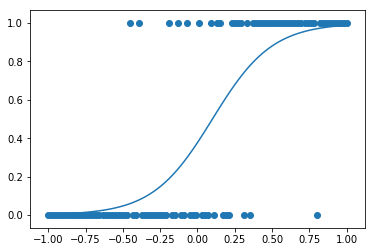

In [91]:
plt.plot(x,prob)
plt.scatter(x,y)
plt.show()

In [92]:
# X macierz, gdzie w pierwszej kolumnie jest siatka od -1 do 1, a w kolejny są kolejne potęgi tej wartości

X = np.vstack([x**p for p in range(1,20)]).T
X

array([[-1.        ,  1.        , -1.        , ..., -1.        ,
         1.        , -1.        ],
       [-0.97979798,  0.96000408, -0.94061006, ..., -0.70684009,
         0.69256049, -0.67856937],
       [-0.95959596,  0.92082441, -0.88361938, ..., -0.49602433,
         0.47598295, -0.45675131],
       ...,
       [ 0.95959596,  0.92082441,  0.88361938, ...,  0.49602433,
         0.47598295,  0.45675131],
       [ 0.97979798,  0.96000408,  0.94061006, ...,  0.70684009,
         0.69256049,  0.67856937],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [93]:
#Dopasowujemy model bez regularyzacji y od x:

model = LogisticRegression(C=10000000)
model.fit(X[:,:1],y)
model.intercept_, model.coef_

(array([-0.49517006]), array([[4.82482191]]))

Jest w miarę blisko.

Teraz z regularyzacją nadal na podstawie samego x:

In [94]:
model = LogisticRegression(C=1)
model.fit(X[:,:1],y)
model.intercept_, model.coef_

(array([-0.32353927]), array([[3.1465584]]))

Współczynniki się zmniejszyły.

Zobaczmy jaki to ma sens na przypadku, gdy mamy w modelu nie potrzebne zmienne.

Najpierw bez regularyzacji:

In [95]:
model = LogisticRegression(C=10e10)
model.fit(X,y)
model.intercept_, model.coef_

(array([-0.6896042]),
 array([[ 2.04490818e+00,  8.65048933e-01,  9.16206820e+01,
         -1.77087394e+02, -9.96611416e+02,  2.04739788e+03,
          3.23719803e+03, -3.48756564e+03, -3.02503101e+01,
         -3.28813028e+03, -7.94512726e+02, -1.36514745e+03,
          1.24500049e+02,  4.29766397e+02,  1.26480814e+03,
          1.63472735e+03,  2.04658921e+03,  2.25756690e+03,
          2.39452026e+03]]))

Widzimy, że współczynniki przy zmiennych, które nie występują w prawdziwej zależności są bardzo duże (a gdyby model wykrył prawdziwą zależność, to byłyby one zerowe).

Podejrzyjmy wykres:

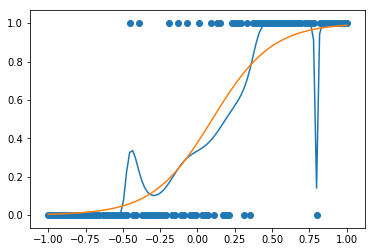

In [96]:
plt.plot(x,1/(1 +np.exp(-model.intercept_ - np.dot(X, model.coef_.T))))
plt.plot(x,prob)
plt.scatter(x,y)
plt.show()

Teraz zróbmy z regularyzacją i znowu podejrzyjmy wykres:

[-0.34988472] [[ 2.71158415  0.176534    0.89544981 -0.07120611  0.39546287 -0.08694067
   0.22577683 -0.05754298  0.15855956 -0.02904018  0.12709346 -0.00882528
   0.10913818  0.00405256  0.09679207  0.01171294  0.08714052  0.01594179
   0.07906866]]


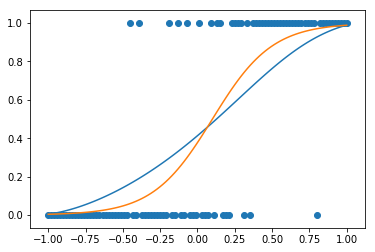

In [100]:
model = LogisticRegression(C=1)
model.fit(X,y)
print(model.intercept_, model.coef_)

plt.plot(x,1/(1 +np.exp(-model.intercept_ - np.dot(X, model.coef_.T))))
plt.plot(x,prob)
plt.scatter(x,y)
plt.show()

### Zadanie: 

Narysować wykresy krzywych prawdopodobieństwa w zależności od C.

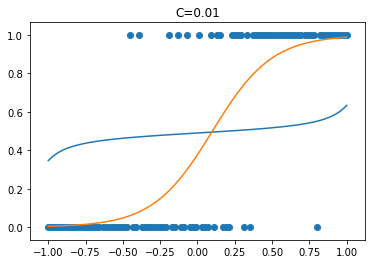

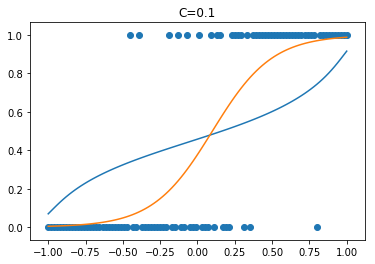

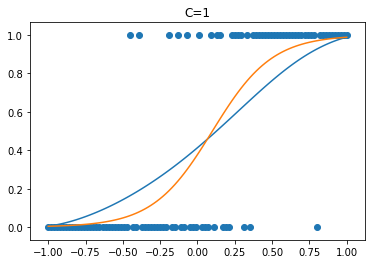

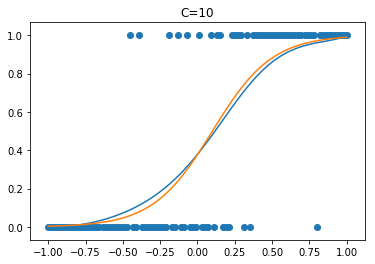

In [107]:
for c in [0.001, 0.01, 0.1, 1, 10]:
    model = LogisticRegression(C=c)
    model.fit(X,y)

    plt.plot(x,1/(1 +np.exp(-model.intercept_ - np.dot(X, model.coef_.T))))
    plt.plot(x,prob)
    plt.scatter(x,y)
    plt.title('C='+str(c))
    plt.show()

### Jak stwierdzić czy model jest dobrze dopasowany? Czy nie za słabo, ani za mocno?

1. Gdy na zbiorze testowym niski procent poprawnych predykcji (np. 60%), a na treningowym model bardzo dobrze dopasowany (np. 90%) -> model przeuczony

2. Gdy na zbiorze treningowym model bardzo nisko dopasowany (np. rzędu pięćdziesiąt kilka procent) -> model słabo dopasowany.

Co to jest niskie dopasowanie? -> zależy od danych...

Co to jest duża różnica? -> zależy od danych... (i ich wielkości - istotność statystyczna!). Realnie, wyniki na testowym powinny być trochę niższe od dopasowania na treningowym (lub podobne). Klasyfikator w oczywisty sposób nie może działać lepiej niż dopasowanie na zbiorze treningowym - bo dopasowanie pokazuje jak dużo zależności wykrył w danych, na podstawie których będzie klasyfikował. Zatem jeżeli mamy dopasowanie na zbiorze treningowym np. 90%, to maksymalna moc predykcyjna jakiej możemy oczekiwać to 90%.

## Przygotowanie danych - bardzo ważna sprawa!!!

Czy wartości zmiennych mają wpływ na wynik modelu?

Wyobraźmy sobie dwie zmienne, gdzie jedna ma wielkości rzędu 1, a druga rzędu 100, a rzeczywisty współczynnik przy pierwszej wynosi 1, a przy drugiej 0.01.

Jak konsekwencje będzie miało zastosowanie regularyzacji?

Zmienna pierwsza zostanie dużo mocniej "ukarana" niż druga, tzn. model mocno "ściągnie" współczynnik przy pierwszej, a zostawi przy drugiej...

Jak temu zaradzić? -> skalowanie

In [108]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.33)

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [111]:
X_tr = sc.transform(X_train)
X_te = sc.transform(X_test)

## Pipeline

W powyższym przykładzie widzimy, że budowanie modelu składa się w rzeczywistości w dwóch kroków - transformacja zmiennych, a potem dopasowanie modelu. To są tzw. pipeline'y.

In [125]:
from sklearn.pipeline import Pipeline

In [126]:
?Pipeline

In [127]:
pipe = Pipeline([("standarization",StandardScaler()),("LogisticRegression",LogisticRegression())])

In [128]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LogisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [129]:
pipe.predict(X_test)

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [135]:
accuracy_score(pipe.predict(X_test), y_test)
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

### Zadanie: 

Policzyć kroswalidacyjnie accuracy tego pipeline'a (użyć funkcji cross_val_score)

In [138]:
cs = cross_val_score(pipe, X, y, cv=10)
print(cs)
print(cs.mean())

[0.54545455 0.54545455 1.         1.         1.         1.
 1.         1.         0.55555556 0.44444444]
0.809090909090909


# Optymalizacja parametrów

GridSearch

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
?GridSearchCV

In [75]:
param_grid = {"penalty":["l1","l2"],
              "C":[1000,100,10,1,0.1,0.01]}

gs = GridSearchCV(LogisticRegression(),param_grid,cv = 5)

In [76]:
gs.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1000, 100, 10, 1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [77]:
gs.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.95958, std: 0.01795, params: {'C': 1000, 'penalty': 'l1'},
 mean: 0.95079, std: 0.01173, params: {'C': 1000, 'penalty': 'l2'},
 mean: 0.96661, std: 0.00995, params: {'C': 100, 'penalty': 'l1'},
 mean: 0.95079, std: 0.01156, params: {'C': 100, 'penalty': 'l2'},
 mean: 0.96134, std: 0.00686, params: {'C': 10, 'penalty': 'l1'},
 mean: 0.95255, std: 0.01500, params: {'C': 10, 'penalty': 'l2'},
 mean: 0.95079, std: 0.01594, params: {'C': 1, 'penalty': 'l1'},
 mean: 0.95079, std: 0.01594, params: {'C': 1, 'penalty': 'l2'},
 mean: 0.92794, std: 0.01492, params: {'C': 0.1, 'penalty': 'l1'},
 mean: 0.94552, std: 0.01944, params: {'C': 0.1, 'penalty': 'l2'},
 mean: 0.91916, std: 0.01770, params: {'C': 0.01, 'penalty': 'l1'},
 mean: 0.92794, std: 0.01484, params: {'C': 0.01, 'penalty': 'l2'}]

In [78]:
gs.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
gs.best_params_

# Uwaga: zwraca tylko parametey, które optymalizowaliśmy, a nie wszystkie parametry modeleu

{'C': 100, 'penalty': 'l1'}

### Wersja z pipelinem:

In [86]:
pipe = Pipeline([("scale",StandardScaler()),("log_reg",LogisticRegression())])

param_grid = {"scale__with_mean":[True],
              "log_reg__penalty":["l1","l2"],
              "log_reg__C":[1000,100,10,1,0.1,0.01]}

gs = GridSearchCV(pipe,param_grid,cv = 5)

gs.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scale__with_mean': [True], 'log_reg__penalty': ['l1', 'l2'], 'log_reg__C': [1000, 100, 10, 1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# Drzewo decyzyjne

Załóżmy, że mamy dwie zmienne ($X[0], X[1]$) i problem klasyfikacji binarnej ($Y \in \{0,1\}$).


<img src="Grafika/decision_tree.png" style="width: 600px;">


## Jak rośnie drzewno?

Drzewo rośnie od korzenia - tzn. budujemy model od góry. Będąc w aktualnym węźle szukamy najlepszego podziału - rozpatrujemy wszystkie zmienne ze wszystkimi możliwymi podziałami i tworzymy rozgałęzienie według najlepszej opcji.

Co to znaczy najlpszy podział? Rozważmy klasyfikację binarną.

<br>

<br>

Opcja nr 1: Gini impurity (Miara Gini'ego niespójności węzła):
- wybieramy podział, który minimalizuje ważoną miarę Giniego $g(p) = 2p(1-p)$:

$$\frac{n_1}{N}g(p_1) + \frac{n_2}{N}g(p_2),$$

gdzie $n_1, n_2$ liczności w pierwszym i drugim dziecku, $N = n_1 + n_2$, $p_1, p_2$ - procent obserwacji, dla których $Y=1$ w dzieciach 1 i 2.

<img src="Grafika/gini_entropy.png"style="width: 400px;">

<br>

Opcja nr 2: Entropia.
- wybieramy podział, który daje najmniejszą wartość ważonej entropii $h(p) = -p\log{(p)} - (1-p)\log{(1-p)}$:

$$\frac{n_1}{N} h(p_1) + \frac{n_2}{N}h(p_2),$$

gdzie $p_1, p_2$ - procent obserwacji, dla których $Y=1$ w dzieciach 1 i 2.

## Do kiedy tworzymy nowe podziały? 

Możliwe są różne warunki stopu. Najpopularniejsze to:

- maksymalna głębokość drzewa,
- minimalna liczba obserwacji w liściu.

Często stosowane w połączeniu.

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
?DecisionTreeClassifier

Dane te co poprzednio:

In [141]:
data = load_breast_cancer()

X, y = data.data, data.target

#### Zadanie 

Wczytaj zbiór `zbiór1.txt` (funkcja loadtxt w numpy) i podziel go na część uczącą (200 obserwacji) i testową (100). Dopasuj model regresji logistycznej na zbiorze uczącym i oblicz accuracy na zbiorze testowym. Następnie oblicz procent poprawnych dopasowań na zbiorze treningowym.

Następnie narysuj 4 histogramy wartości obu zmiennych w pozbiorach wyznaczonych przez wartość $Y$. Czy widzisz jakąś zależność między zmiennymi objaśniającymi a zmienną objaśnianą?

Następnie zbuduje drzewo klasyfikacyjne i policz dla niego accuracy.

In [198]:
import numpy as np
dane = np.loadtxt("Dane/zbior1.txt")
x = np.array(dane)[:,[0,1]]
y = np.array(dane)[:,2]
# print(x)
# print(y)
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=100)

model = LogisticRegression()
model.fit(x_train,y_train)
model.intercept_, model.coef_

(array([0.11986515]), array([[-0.58172581,  0.44780458]]))

In [200]:
accuracy_score(model.predict(x_test), y_test)

0.57

In [201]:
accuracy_score(model.predict(x_train), y_train)

0.65

Czy widzimy jakieś zależności w danych?:

Jak naprawdę wyglądały dane:

Drzewo można sobie narysować (do pliku):

### Bardzo ważna sprawa: wnioskowanie o zależności zmiennych na podstawie analizy jednowymiarowej nie nie ma większego sensu!

- jeśli nie widać zależności, to nie znaczy, że jej nie ma,
- jeżeli widać zależność, to wcale nie musi oznaczać zależności przyczynowo-skutkowej (dana cecha może być skorelowana z inną cechą, która faktycznie wpływa na y).
- zjawisko fałszywej korelacji - statystycznie rzecz biorąc, regularnie zdarzaja się sytuacje, kiedy zmienne wyglądają na zależne, a tak naprawde nie są...

#### Naturalnie analiza wielowymiarowa (model) też może nie wykryć zależności... Sztuka analizy danych polega między innymi na szukaniu tych zależności.

# Klasyfikacja wieloklasowa

## Regresja logistyczna

*(dokładniejszy opis: https://en.wikipedia.org/wiki/Multinomial_logistic_regression)*


\begin{align}
\Pr(Y_i=1) &= \frac{1}{1+Z} e^{\boldsymbol\beta_1 \cdot \mathbf{X}_i} \, \\
\Pr(Y_i=2) &= \frac{1}{1+Z} e^{\boldsymbol\beta_2 \cdot \mathbf{X}_i} \, \\
\cdots & \cdots \\
\Pr(Y_i=K-1) &= \frac{1}{1+Z} e^{\boldsymbol\beta_{K-1} \cdot \mathbf{X}_i} \, \\
\Pr(Y_i=K) &= \frac{1}{1+Z} \, \\
\end{align}


$Z = \sum_{k=1}^{K-1} e^{\boldsymbol\beta_k \cdot \mathbf{X}_i}$

### Definicja alternatywna
:

$$[P(Y=1), P(Y=2), \ldots , P(Y=K)] = softmax([\beta_1x_1, \beta_2x_2, \ldots , \beta_Kx_K]) = 
[\frac{e^{\beta_1x_1}}{\sum_{k=1}^{K}e^{\beta_kx_k}}, \frac{e^{\beta_2x_2}}{\sum_{k=1}^{K}e^{\beta_kx_k}}, \ldots, \frac{e^{\beta_Kx_K}}{\sum_{k=1}^{K}e^{\beta_k x_k}}]$$

Na marginesie: w uczeniu maszynowym często pojawia sie funkcja "softmax".

$$softmax(\mathbf{x}) = [\frac{e^{x_1}}{\sum_{k=1}^{p}e^{x_k}}, \frac{e^{x_2}}{\sum_{k=1}^{p}e^{x_k}}, \ldots, \frac{e^{x_p}}{\sum_{k=1}^{p}e^{x_k}}]$$



## Drzewo decyzyjne

Przyjmujemy oznaczenie: $p = (p_1, p_2, \ldots, p_K)$ wektor prawdopodobieństw poszczególnych klas (procent obserwacji danej klasy).

Opcja nr 1: Gini impurity (Miara Gini'ego niespójności węzła):
- wybieramy podział, który minimalizuje ważoną miarę Gini'ego $g(p) = \big( 1 - \sum\limits_{k=1}^K p_k^2 \big)$:

$$\frac{n_1}{N} g(p_1) + \frac{n_2}{N} g(p_2),$$

gdzie $n_1, n_2$ liczności w pierwszym i drugim dziecku, $p_1, p_2$ - rozkłady klas w dzieciach.

<br>

Opcja nr 2: Entropia.
- wybieramy podział, który daje najmniejszą wartość ważonej entropii $h(p) = -\sum\limits_{k=1}^K p_k\log p_k$:

$$\frac{n_1}{n}\sum\limits_{i=1}^{n_1} h(p_1) + \frac{n_2}{n}\sum\limits_{i=1}^{n_2} h(p_2)$$


#### Zadanie

Wygenerować predykcje kroswalidacyjnie dla regresji logistycznej i drzewa decyzyjnego (użyj `cross_val_predict`), a następnie wypisz accuracy i przedstaw tablicę klasyfikacji (`confusion_matrix` z `sklearn.metrics`) dla obu modeli.

In [184]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape
y
m = LogisticRegression()
m.fit(X,y)
m.intercept_, m.coef_
# sa trzy klasy wiec mamy trzy wektory beta - sklearn uzywa drugiej definicji
# regresji logistycznej w przypaku wielu klas

(array([ 0.26560617,  1.08542374, -1.21471458]),
 array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
        [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
        [-1.70752515, -1.53426834,  2.47097168,  2.55538211]]))

In [185]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

pred1 = cross_val_predict(LogisticRegression(),X,y)
pred2 = cross_val_predict(DecisionTreeClassifier(),X,y)

In [186]:
print(accuracy_score(pred1, y))
confusion_matrix(y,pred1)

0.9466666666666667


array([[50,  0,  0],
       [ 0, 44,  6],
       [ 0,  2, 48]], dtype=int64)

In [187]:
print(accuracy_score(pred2, y))
confusion_matrix(y,pred2)

0.9666666666666667


array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  3, 47]], dtype=int64)

# Naiwny klasyfikator Bayes'a

Rozważmy klasyfikację wieloklasową - $Y \in \{1, 2, \ldots, K\}$. 

Naiwny klasyfikator Bayesa klasyfikuje obserwacje na podstawie prawdopodobieństwa:

$$p(Y = k \mid x_1, \dots, x_p)  = p(C_k \mid x_1, \dots, x_p).$$

Predykcja klasyfikatora to najbardziej prawdopodobna klasa.

Skąd klasyfikator bierze to prawdopodobieństwo? Oblicza je przyjmując pewne założenia...

Z twierdzenia Bayesa:


$$p(C_k \mid \mathbf{x}) = \frac{p(C_k) \ p(\mathbf{x} \mid C_k)}{p(\mathbf{x})}.$$

Zauważmy, że $p(\mathbf{x})$, czyli rozkład X, jest nieistotny dla klasyfikatora, zatem: 

$$p(C_k \mid \mathbf{x}) \sim p(C_k) \ p(\mathbf{x} \mid C_k).$$

$p(C_k)$ - prawdopodobieśtwo a priori klasy $C_k$ - czyli procent obserwacji w danych, dla których $Y = k$.

$p(\mathbf{x} \mid C_k) = p(x_1, x_2, \ldots, x_p \mid C_k)$ - rozkład cech w pozbiorze danych, dla których $Y = C_k$.


(**Naiwne**) założenie modelu:

$$p(x_1, x_2, \ldots, x_p \mid C_k) = p(x_1 \mid C_k)\cdot p(x_2\mid C_k) \cdot \ldots \cdot p(x_p \mid C_k)$$

Zatem predykcja klasyfikatora ma postać:

$$\hat{y} = arg \max\limits_k  p(C_k \mid \mathbf{x}) = arg \max\limits_k p(C_k) \prod\limits_{i=1}^p p(x_i\mid C_k)$$

Skąd bierzemy $p(x_i\mid C_k)$?

Z postaci danych:
- jeżeli zmienna $x_i$ jest binarna, to zakładamy, że rozkład jest dwupunktowy - prawdopodobieństwo sukcesu model wylicza empirycznie z danych,
- jeżeli zmienna $x_i$ jest licznością, to zakładamy, że rozkład jest wielomianowy - prawdopodobieństwa poszczególnych wartości model wylicza empirycznie z danych,
- jeżeli zmienna $x_i$ jest rzeczywista, to zakładamy, że rozkład jest normalny - parametry (średnią i wariancję) model estymuje z danych.

Uwaga: ostatnie wersja w praktyce z reguły działa słabo.

In [ ]:
from sklearn.naive_bayes import MultinomialNB # wersja wielomianowa

In [ ]:
?MultinomialNB

# Case study

Dane

http://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

In [ ]:
import pandas as pd

sms = pd.read_table('Dane/sms.tsv', header=None, names=['label', 'message'])

#url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
#sms = pd.read_table(url, header=None, names=['label', 'message'])

sms.shape

In [ ]:
sms.head()

In [ ]:
sms['label'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

In [ ]:
# examine the class distribution
sms.label.value_counts(normalize=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sms.message[:10]

In [ ]:
vectorizer = CountVectorizer(max_features=3000)
vectorizer.fit(sms.message)
x = vectorizer.transform(sms.message)
x

In [ ]:
x[:10,:10].todense()

In [ ]:
vectorizer.vocabulary_ # przypisanie kolumn do slow

# Cel: zaimplementować w pełni zautomatyzowane znajdowanie najlepszego modelu

Na samym początku wydzielić 1000 obserwacji na zbiór testowy, na którym na samym końcu przetestujemy najlepszy model. Podczas szukania najlepszego modelu nie dotykamy tego zbioru!

Wejście:
- lista modeli w postaci ogólnie, którą podaje się do funkcji Pipeline (czyili listy krotek dwuelementwych),
- lista siatek parametrów, które chcemy zbadać, dla odpowiadająych modeli,

Wyjście 
- na zbiorze testowym policzyć accuracy najlepszego modelu.

**Ważne** Każdą analizę (szukanie najlepszego modelu) zawsze należy zacząć od wyznaczenia punktu odniesienia. Czym powinien być punkt odniesienia? Jest to <u>prosta</u> metoda predykcji lub wręcz trywialna. Opcja 1: prosty klasyfikator z parametrami domyślnymi. Opcja 2. Predykcja trywialna - bezmodelowa, np. predykcja stała klasą dominującą (przykładowo jeżeli w danych jest np. $70\%$ oberwacji klasy 1, to predykcja stała równa 1 będzie miała accuracy $70\%$).

Zatem krok pierwszy - obliczenie baseline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer

import pprint
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.metrics import accuracy_score


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(sms.message, sms.label,test_size=1000)

In [ ]:
#Inny rodzaj sklalowania: podzielenie zmiennych przez maksimum z ich wartosci. 
#Jezeli nasze zmienne sa nieujemne, to w wyniku dostaniemy zmienne zprzedzialu [0,1].

from sklearn.preprocessing import MaxAbsScaler
?MaxAbsScaler

Definiujemy liste rozważanych modeli (pipelinow) i siatki parametrow, ktore chcemy przebadac:

In [ ]:
models = [[("scale",MaxAbsScaler()), ("model",LogisticRegression())],
          [("model",DecisionTreeClassifier())],
          [("model",MultinomialNB())]]
param_grids = [{"model__C":[0.001,0.01,0.1,1,10,100,1000,10000,100000,10e7], "model__penalty":["l1","l2"]},
               {"model__min_samples_leaf":[1,2,3,4,5,10,15,25,50],"model__max_depth":[5,10,15,25,50]},
               {}]

Obliczamy "baseline" - punkt odniesienia - jakieś proste modele z domyślnymi parametrami. Można wziąć więcej niż jeden.

In [ ]:
model = Pipeline([("vectorizer",CountVectorizer()),("scale",MaxAbsScaler()), ("model",LogisticRegression())])
model.fit(X_train,y_train)
accuracy_score(model.predict(X_test),y_test)

Czyli bez żadnej pracy mamy 97%!

Szukamy w zautomatyzowany sposób najlepszych paremetrów dla każdego modelu.

In [ ]:
best_models = []
vectorizer = [("vectorizer",CountVectorizer())]

for pipe, params in zip(models,param_grids):
    
    # sklejamy pipeline: do wektoryzatora dodajemy kolejne kroki -
    # model z ewentualnymi transformacjami
    pipeline = Pipeline(vectorizer+pipe) #"+" oznacza sklejenie list
    
    print(pipeline) 
    
    gs = GridSearchCV(estimator=pipeline, param_grid=params)
    gs.fit(X_train,y_train)
    pprint.pprint(gs.grid_scores_) #wypisujemy ladnie wyniki kroswalidacji
    best_models.append(gs.best_estimator_) # zapisujemy mmodel z najlepszymi parametrami

In [ ]:
# Sprawdzenie kazdego modelu z najlpeszymi parametrami na zbiorze testowym:
# przy okazji dopasowanie na zbiorze treningowym  
    
for best_model in best_models:
    print("Jakosc predykcji: ", accuracy_score(best_model.predict(X_test),y_test), "; Dopasowanie z zb. treningowym: ",accuracy_score(best_model.predict(X_train),y_train))

Raport z analizy:

Najlepszy model to ... z parametrami ... .